In [3]:
!apt-get update && python -m pip install --upgrade pip && apt-get -y install vim rsync coreutils git-lfs less && pip install tensorflow 

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease               
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgpm2 libpopt0 libsodium23 vim-common vim-runtime xxd
Suggested packages:
  gpm python3-braceexpand ctags vim-doc vim-scripts
The following NEW packages will be installed:
  git-lfs less libgpm2 libpopt0 libsodium23 rsync vim vim-common vim-runtime
  xxd
The following packages will be upgraded:
  coreutils
1 upgraded, 10 newly installed, 0 

In [ ]:
! git clone https://github.com/oleksandr-diudiun/mlx-week5.git
import os
os.chdir('mlx-week5')
! git lfs pull

In [2]:
!pip install pandas
!pip install pyarrow

!pip install Pillow
!pip install matplotlib
!pip install scikit-learn
!pip install torch
!pip install tqdm
!pip install ipdb
!pip install sentencepiece
!pip install tensorboard
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 48.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 93.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 85.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 42.4 MB/s eta 0:00:0

In [3]:
from pathlib import Path
import os


# os.chdir("/root/workspace/mlx-week5/sid")
print(os.getcwd())
# root_path = Path(os.getcwd()).resolve().parents[0]
# print(root_path)
# os.chdir("/root/workspace/mlx44/src")
# os.mkdir(root_path / "workspace/mlx-week5")
# root = Path("/Users/sid/workspace/mlx-week5")
root = Path("/root/mlx-week5")
root.mkdir(exist_ok=True)
train_data_path = root / "train"
TENSORBOARD_LOGS = root / ".logs"
os.mkdir(TENSORBOARD_LOGS)

print(train_data_path)
os.chdir(root)

/


FileExistsError: [Errno 17] File exists: '/root/mlx-week5/.logs'

In [56]:
root

PosixPath('/root/workspace/mlx-week5')

In [4]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import io
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from collections import defaultdict
import numpy as np
import itertools as its
from tqdm import tqdm
import ipdb
from collections import namedtuple
from importlib import reload

In [5]:
# How to check is mps is available on my M1 MAC?
torch.backends.mps.is_available()
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
    # else ("mps" if torch.backends.mps.is_available() else "cpu")
)
device

device(type='cuda')

# Total config



In [6]:
_VOCAB_SIZE = 10000
_T = 256  # Window size
_V = _VOCAB_SIZE
_B = 64
SOS = "<SOS>"
EOS = "<EOS>"
_MAX_LEN_SEQ = _T
_N_EMBED = 256
_Dk = 128
_Dv = 128
_P_DROPOUT = 0.3
_KEEP_BIAS = False

model_param_config = {
    "MAX_LEN_SEQ": _MAX_LEN_SEQ,
    "N_EMBED": _N_EMBED,
    "Dk": _Dk,
    "Dv": _Dv,
    "V": _V,
    "P_DROPOUT": _P_DROPOUT,
    "KEEP_BIAS": _KEEP_BIAS,
    "T": _T,
    "B": _B,
    "N_HEAD": 4,
}

# Load the data from a single parquet file

In [7]:
# read a parquet file into a pandas dataframe
import pandas as pd
import pyarrow.parquet as pq

first_file = pd.read_parquet(train_data_path / "0000.parquet", engine="pyarrow")

In [8]:
all_sentences = first_file["text"].values
all_sentences = all_sentences.tolist()
all_sentences[0:5]

['One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.\n\nLily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."\n\nTogether, they shared the needle and sewed the button on Lily\'s shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.',
 'Once upon a time, there was a little car named Beep. Beep loved to go fast and play in the sun. Beep was a healthy car because he always had good fuel. Good fuel made Beep happy and strong.\n\nOne day, Beep was driving in the park when he saw a big tree. The tree had many leaves that we

In [9]:
len(all_sentences), all_sentences[100]

(529930,
 "There was a little girl with dark hair. Her name was Joy. She lived in a big house with her parents. One day, Joy was playing outside in her garden. Suddenly, she felt something on her leg - something pinching her. It was a big, black bug! \n\nJoy screamed and tried to get away, but the bug kept following her. She tried to run and hide, but it was too quick. \n\nJoy's parents heard her cries and came running. They used a stick to help her get rid of the bug. After the bug was gone, they hugged Joy and told her everything would be alright. \n\nWhen the bug was gone, Joy felt relieved and happy. She went back to playing in the garden, making sure she didn't step on any more bugs.")

# Use sentence piece to tokenize the sentences

In [10]:
# Lets tokenize using sentence piece
from sentencepiece import SentencePieceTrainer, SentencePieceProcessor
import io


# for article in articles[0:100]:
def get_data():
    for i in range(100):
        file = pd.read_parquet(
            train_data_path / f"{str(i).zfill(4)}.parquet", engine="pyarrow"
        )
        for sentence in file["text"].values:
            yield sentence


def get_model(train, config):
    model = io.BytesIO()
    model_filename = root / "models/tiny_stories_tokenizer.model"
    if train:
        SentencePieceTrainer.train(
            sentence_iterator=(story.lower() for story in all_sentences),
            model_writer=model,
            vocab_size=config["V"],
            user_defined_symbols=[SOS, EOS],
            # max_sentence_length=4196,
            # model_type="BPE",
        )
        sp_processor = SentencePieceProcessor(model_proto=model.getvalue())
    else:
        sp_processor = SentencePieceProcessor(model_file=str(model_filename))
    return sp_processor, model


def save_model(model):
    model_filename = root / "models/tiny_stories_tokenizer_2.model"
    with open(model_filename, "wb") as f:
        print(".")
        f.write(model.getvalue())

In [11]:
root

PosixPath('/root/mlx-week5')

In [12]:
sp_processor, model = get_model(train=False, config=model_param_config)

In [13]:
# EXECUTE ONCE WHEN YOU HAVE IT MADE
# save_model(model)

In [14]:
print(all_sentences[100])
print(".")
print(
    " ".join(
        [
            w
            for lst in sp_processor.encode_as_pieces(
                [story.lower() for story in all_sentences[100:101]]
            )
            for w in lst
        ]
    )
)
print("..")
print(sp_processor.encode_as_ids(all_sentences[100:101]))

There was a little girl with dark hair. Her name was Joy. She lived in a big house with her parents. One day, Joy was playing outside in her garden. Suddenly, she felt something on her leg - something pinching her. It was a big, black bug! 

Joy screamed and tried to get away, but the bug kept following her. She tried to run and hide, but it was too quick. 

Joy's parents heard her cries and came running. They used a stick to help her get rid of the bug. After the bug was gone, they hugged Joy and told her everything would be alright. 

When the bug was gone, Joy felt relieved and happy. She went back to playing in the garden, making sure she didn't step on any more bugs.
.
▁there ▁was ▁a ▁little ▁girl ▁with ▁dark ▁hair . ▁her ▁name ▁was ▁joy . ▁she ▁lived ▁in ▁a ▁big ▁house ▁with ▁her ▁parents . ▁one ▁day , ▁joy ▁was ▁playing ▁outside ▁in ▁her ▁garden . ▁suddenly , ▁she ▁felt ▁something ▁on ▁her ▁leg ▁- ▁something ▁pinching ▁her . ▁it ▁was ▁a ▁big , ▁black ▁bug ! ▁joy ▁screamed ▁and ▁

## What story lengths can be found within length X? 
Cause then EOS and SOS start to make sense. 

Conclusion: MANY


In [15]:
all_story_tokens = sp_processor.encode_as_ids(all_sentences)

In [16]:
print(len(all_story_tokens))
print(np.sum([len(story) <= 256 for story in all_story_tokens]))  # Many...
print(np.sum([256 < len(story) < 512 for story in all_story_tokens]))

529930
437401
78509


In [17]:
sp_processor.encode_as_pieces(
    "<SOS> hen the bug was gone, Joy felt relieved and happy. She went <EOS>"
)

# sp_processor.encode_as_ids("<SOS>en the bug was gone, Joy felt relieved and happy. She went <EOS>")
for sentence in all_sentences[100:110]:
    sentence = f"<SOS>{sentence.lower()}<EOS>"
    print(sp_processor.encode_as_pieces(sentence))
# sp_processor.encode_as_pieces("<SOS>hen the bug was gone, Joy felt relieved and happy. She went<EOS>")

['▁', '<SOS>', 'the', 're', '▁was', '▁a', '▁little', '▁girl', '▁with', '▁dark', '▁hair', '.', '▁her', '▁name', '▁was', '▁joy', '.', '▁she', '▁lived', '▁in', '▁a', '▁big', '▁house', '▁with', '▁her', '▁parents', '.', '▁one', '▁day', ',', '▁joy', '▁was', '▁playing', '▁outside', '▁in', '▁her', '▁garden', '.', '▁suddenly', ',', '▁she', '▁felt', '▁something', '▁on', '▁her', '▁leg', '▁-', '▁something', '▁pinching', '▁her', '.', '▁it', '▁was', '▁a', '▁big', ',', '▁black', '▁bug', '!', '▁joy', '▁screamed', '▁and', '▁tried', '▁to', '▁get', '▁away', ',', '▁but', '▁the', '▁bug', '▁kept', '▁following', '▁her', '.', '▁she', '▁tried', '▁to', '▁run', '▁and', '▁hide', ',', '▁but', '▁it', '▁was', '▁too', '▁quick', '.', '▁joy', "'", 's', '▁parents', '▁heard', '▁her', '▁cries', '▁and', '▁came', '▁running', '.', '▁they', '▁used', '▁a', '▁stick', '▁to', '▁help', '▁her', '▁get', '▁rid', '▁of', '▁the', '▁bug', '.', '▁after', '▁the', '▁bug', '▁was', '▁gone', ',', '▁they', '▁hugged', '▁joy', '▁and', '▁told', '▁

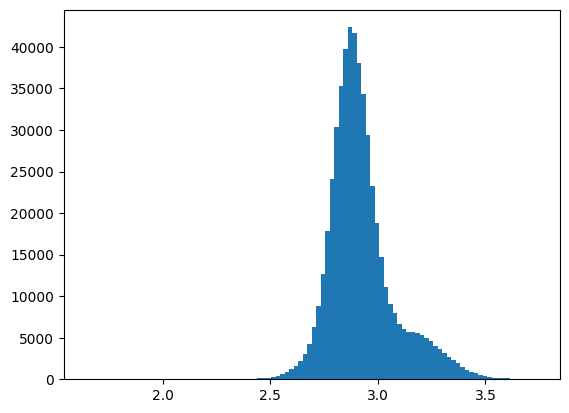

In [18]:
_ = plt.hist([np.log10(len(i)) for i in all_sentences if len(i) > 0], bins=100)

In [19]:
sentence_tokens = sp_processor.encode_as_ids(all_sentences[0:10000])

In [20]:
from collections import Counter

c = Counter(s for story in all_sentences[0:2000] for s in story.lower().split())

In [21]:
c.most_common(100)  #

[('the', 19446),
 ('and', 15380),
 ('to', 11073),
 ('a', 10305),
 ('was', 9370),
 ('he', 7614),
 ('she', 7045),
 ('they', 4960),
 ('it', 4864),
 ('her', 3894),
 ('in', 2947),
 ('his', 2923),
 ('so', 2905),
 ('with', 2632),
 ('of', 2603),
 ('had', 2327),
 ('that', 2185),
 ('but', 2071),
 ('little', 1853),
 ('one', 1806),
 ('very', 1771),
 ('for', 1765),
 ('there', 1690),
 ('you', 1653),
 ('on', 1598),
 ('said,', 1457),
 ('day,', 1445),
 ('once', 1408),
 ('saw', 1358),
 ('were', 1343),
 ('big', 1269),
 ('mom', 1246),
 ('wanted', 1214),
 ('upon', 1183),
 ('girl', 1162),
 ('all', 1144),
 ('is', 1137),
 ('not', 1103),
 ('lily', 1095),
 ('said', 1063),
 ('at', 987),
 ('happy', 984),
 ('when', 979),
 ('play', 961),
 ('went', 939),
 ('be', 929),
 ('i', 920),
 ('their', 905),
 ('time,', 888),
 ('up', 881),
 ('have', 876),
 ('are', 837),
 ('from', 823),
 ('looked', 809),
 ('go', 798),
 ('would', 773),
 ('could', 753),
 ('day', 751),
 ('felt', 734),
 ('can', 733),
 ('him', 731),
 ('it.', 727),
 (

# Data generation utilities

## Split data into fixed sequence lengths

In [22]:
# Lets create a dataset

# This is a bit slow because it generates S*(N - T) samples of length T each, where S is the number of sentences and N is the number of tokens in the sentence
# TODO: If slow stupidly parallelize and load it into a numpy array and save it to a file, then memory map that file and load it into a torch tensor.
torch.manual_seed(42)


def data_generator(tokens, config):
    # xy = []  # x: T word window, y is T+1th word
    # Create a random minimatch
    seq_len = config["T"]
    ix = torch.randint(len(tokens) - seq_len, (config["B"],))
    x = [tokens[i : i + seq_len] for i in ix]
    y = [tokens[i + 1 : i + seq_len + 1] for i in ix]
    return x, y


x, y = data_generator(
    sp_processor.encode_as_ids(" ".join(all_sentences[2301:2340])), model_param_config
)
print(len(x), x[1])
print(len(y), y[1])

64 [66, 88, 54, 70, 20, 5, 17, 153, 92, 7, 157, 6, 596, 65, 35, 7, 409, 5, 17, 110, 10, 1157, 673, 24, 7, 715, 8, 10, 661, 24, 7, 453, 8, 10, 408, 24, 7, 566, 8, 6, 10, 3434, 312, 24, 7, 1536, 5, 17, 203, 36, 10, 238, 39, 8, 218, 33, 191, 64, 42, 1334, 65, 5, 13, 863, 8, 70, 8, 39, 36, 837, 54, 138, 20, 5, 13, 686, 8, 138, 8, 132, 18, 328, 440, 54, 26, 6, 70, 20, 5, 17, 118, 7, 157, 79, 22, 7, 213, 6, 736, 12, 5, 17, 227, 7, 213, 36, 7, 278, 130, 6, 107, 9, 7, 179, 5, 13, 2698, 31, 66, 88, 8, 442, 73, 138, 86, 5, 13, 232, 8, 138, 8, 132, 124, 10, 797, 213, 24, 242, 30, 278, 157, 54, 26, 6, 70, 20, 5, 13, 1579, 797, 213, 244, 394, 872, 546, 54, 138, 20, 5, 14, 82, 6, 189, 65, 10, 292, 5, 14, 868, 129, 515, 7, 213, 467, 7, 160, 5, 198, 6, 143, 131, 9, 57, 35, 7, 595, 5, 17, 131, 9, 99, 678, 2668, 6, 183, 36, 1587, 5, 53, 28, 8, 33, 49, 111, 280, 6, 567, 22, 7, 196, 5, 43, 89, 85, 10, 448, 5, 13, 366, 8, 198, 8, 10, 448, 54, 143, 20, 5, 13, 286, 18, 23, 72, 98, 12, 54, 198, 20, 5, 17, 107

## Data generator by story length(TBD)

In [23]:
length_capped_stores = [
    story_tokens
    for story_tokens in all_story_tokens
    if len(story_tokens) <= model_param_config["T"]
]

In [24]:
# TODO This would need a Custom dataset with a collator to work well. I have done it before and I can pursue this right after.
def data_generator_by_story_length(tokenized_stores, config, max_story_len):
    # xy = []  # x: T word window, y is T+1th word
    # Create a random minimatch
    seq_len = config["T"]
    # return torch padded sequence since all these are smaller
    assert np.all([len(story) <= max_story_len for story in tokenized_stores])
    # use torch padding
    stories_tensor = [
        torch.tensor(story_tokens).view(-1, 1) for story_tokens in tokenized_stores
    ]
    print(len(stories_tensor))
    return torch.nn.utils.rnn.pad_sequence(stories_tensor, batch_first=False)

    # ix = torch.randint(len(tokens) - config[seq_len], (config['B'],))
    # x = [tokens[i : i + seq_len] for i in ix]
    # y = [tokens[i + 1 : i + seq_len + 1] for i in ix]
    # return x, y


# padded_stories = data_generator_by_story_length(
#     length_capped_stores,
#     model_param_config,
#     model_param_config["T"],
# )

In [25]:
torch.tensor(length_capped_stores[5]).view(-1, 1).shape

torch.Size([157, 1])

In [26]:
seq = torch.nn.utils.rnn.pad_sequence(
    [
        torch.tensor(length_capped_stores[0]).view(-1, 1),
        torch.tensor(length_capped_stores[5]).view(-1, 1),
        torch.tensor(length_capped_stores[10]).view(-1, 1),
    ]
)
seq[:, 2, 0]

tensor([  58,   62,   10,   39,    8,   41,   11,   10,   48,  172,   83, 2817,
        5417, 5577, 4640,    5,   16,   32,   10,   37,  335,  664,    5, 2817,
        5417, 5577, 4640,  100,  166,   10,  264,    9,    7,  113,  269,   28,
           5,   19,  264,   32,   10,   42,    8,  171,    8,    6,   10,   40,
          61,   83,   26,    5,   17,   78,   32,   10,  290,   30,  234,   36,
         194,  128,    5,   53,   28,    8,  126,   33,  133,    9,    7,  113,
           8,   33,   49,   10,   48,  810,   29,   20,    8,   13, 6758,   51,
           0, 6125, 1259,   54,   19,  264,   11,   37,  134,    5,   17,  169,
          29, 2817, 5417, 5577, 4640,   11,   37,  289,    6,   90,  965,    7,
         661,    5,  180,    8,   33,  136,    9,  706,    7,  661,    5,   19,
         661,  108,    8,    6, 2817, 5417, 5577, 4640,   71,   37,  289,    5,
          19,  128,  453,  184,    9,  475,   69,    8,   55, 2817, 5417, 5577,
        4640,   11,   80, 2233,    5,  6

In [27]:
len(all_sentences)

529930

In [28]:
def create_all_story_token_ids(sentences):
    # NOTE: We can try and reduce the sentence sizes, because a lot of the data is gibberish
    return [
        sp_processor.encode_as_ids(f"<SOS>{sentence.lower()}<EOS>")
        for sentence in tqdm(sentences)
    ]


def save_all_ids(concatenated_ids):
    torch.save(concatenated_ids, root / "concatenated_ids.pt")


def load_concatenated_ids():
    return torch.load(root / "concatenated_ids.pt")


# concatenated_ids = sp_processor.encode_as_ids(concatenated_sentences)
# x, y pairs

In [29]:
all_story_ids = create_all_story_token_ids(all_sentences)
# save_concatenated_ids(all_story_ids)

100%|██████████| 529930/529930 [03:00<00:00, 2938.17it/s]


In [30]:
concatenated_ids = []
for story in tqdm(all_story_ids):
    concatenated_ids.extend(story)

100%|██████████| 529930/529930 [00:01<00:00, 298114.07it/s]


In [31]:
all_data = []
num_batches = 10000
for _ in tqdm(range(num_batches)):
    x, y = data_generator(
        concatenated_ids, model_param_config
    )  # generate a batch of x, y each has
    assert len(x) == model_param_config["B"] == len(y)
    # print(len(x), len(x[0]))
    for i in range(len(x)):
        x_batch = x[i]
        y_batch = y[i]
        all_data.append((x_batch, y_batch))

 19%|█▉        | 1913/10000 [00:09<00:22, 360.29it/s]

In [93]:
# save_concatenated_ids(concatenated_ids)


[2413, 82, 6, 20, 8, 13, 3828, 18, 328, 775] [82, 6, 20, 8, 13, 3828, 18, 328, 775, 5]


In [30]:
print(len(all_data))
print(len(all_data[0]))
print(len(all_data[0][0]), len(all_data[0][1]))

640000
2
256 256


In [33]:
print(all_data[0][0][0:20])
print(all_data[0][1][0:20])

[540, 6, 7, 2143, 11, 22, 2272, 5, 12, 11, 10, 355, 243, 30, 540, 8, 141, 29, 195, 853]
[6, 7, 2143, 11, 22, 2272, 5, 12, 11, 10, 355, 243, 30, 540, 8, 141, 29, 195, 853, 9]


In [34]:
print(sp_processor.decode_ids(all_data[0][0]))
print(sp_processor.decode_ids(all_data[0][1]))

rain and the stuff was in danger. it was a different kind of rain, one that never seemed to end. the people went to work, doing all kinds of things to try to protect the stuff, but nothing worked. nothing seemed to stop the rain. finally, someone had an idea. they decided to put the stuff in the sun. the sun was so warm and lovely, and gradually, the rain stopped. but the stuff was still wet, so they had to work some more. little by little, they dried the stuff until it was completely dry and safe. everyone was so happy, because the rare stuff was safe, and it could stay with them forever.<EOS> <SOS>once upon a time, there was a large family. they lived in a big house. every day, the parents examined the house to make sure it was safe and comfortable for everyone. one day, the parents were talking about a war. they wanted to make sure their family was protected. the father looked around the house. he said to his wife, â€œwe should examine the house more closely. if a war comes, it shou

In [128]:
Dk**0.5

11.313708498984761

# The model

### Some gradient hooks.

In [35]:
def hook_fn(module, grad_input, grad_output):
    # Log grad_input and grad_output
    # For simplicity, we're only logging the norms; you could log the entire gradients
    grad_input_norm = torch.norm(grad_input[0])  # Assuming single input to softmax
    grad_output_norm = torch.norm(grad_output[0])  # Assuming single output from softmax

    # Store the norms in a global variable for later logging to TensorBoard
    global gradients
    gradients = {
        "grad_input_norm": grad_input_norm,
        "grad_output_norm": grad_output_norm,
    }

In [36]:
from itertools import chain


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, sequence_length):
        super(PositionalEncoding, self).__init__()
        # Create a long enough PE matrix beforehand
        pe = torch.zeros(sequence_length, d_model)
        position = torch.arange(0, sequence_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-2.0 * np.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        print("Pos Enc shape", pe.shape)
        # Register this pe matrix as a constant/static model parameter
        self.register_buffer("pe", pe)

    def forward(self, x):
        """
        x: Tensor, shape [batch_size, seq_len, embedding_dim]
        """
        # Add positional encoding
        return self.pe[:, : x.size(1), :]


class SelfAttentionHead(nn.Module):
    def __init__(self, device, config):
        self.device = device
        self.config = config
        super(SelfAttentionHead, self).__init__()
        self.Wq = nn.Linear(config["N_EMBED"], config["Dk"], bias=config["KEEP_BIAS"])
        self.Wk = nn.Linear(config["N_EMBED"], config["Dk"], bias=config["KEEP_BIAS"])
        self.Wv = nn.Linear(config["N_EMBED"], config["Dv"], bias=config["KEEP_BIAS"])
        self.output_projection = nn.Linear(config["Dv"], config["N_EMBED"])
        self.dropout = nn.Dropout(config["P_DROPOUT"])
        self.residual_dropout = nn.Dropout(config["P_DROPOUT"])

    def forward(self, x):
        q = self.Wq(x)  # B * T * Dk
        k = self.Wk(x)  # B * T * Dk
        v = self.Wv(x)  # B * T * Dv
        self.q = q
        self.k = k
        a = torch.bmm(q, k.transpose(-2, -1)) / (self.config["Dk"] ** 0.5)

        self.effective_T = a.shape[1]
        mask = torch.tril(
            torch.ones(self.effective_T, self.effective_T, device=self.device)
        )
        a = a.masked_fill(mask == 0, float("-inf"))

        self.a = a
        # mask = mask.masked_fill(
        #     mask[: self.effective_T, : self.effective_T] == 0, float("-inf")
        # )
        # a = a + mask
        self.a_softmax = torch.functional.F.softmax(self.a, dim=-1)
        weighted_attention = self.a_softmax @ v
        return self.output_projection(weighted_attention)


class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config["N_EMBED"], config["N_EMBED"] * 4)
        self.relu = nn.ReLU()
        self.c_proj = nn.Linear(config["N_EMBED"] * 4, config["N_EMBED"])
        self.residual_dropout = nn.Dropout(config["P_DROPOUT"])

    def forward(self, x):
        x = self.c_fc(x)
        x = self.relu(x)
        x = self.c_proj(x)
        return x


class Block(nn.Module):

    def __init__(self, device, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config["N_EMBED"])
        self.attn = SelfAttentionHead(device, config)
        self.ln_2 = nn.LayerNorm(config["N_EMBED"])
        self.mlp = MLP(config)

    def forward(self, x):
        # Make sure Dropout is NOT applied in self.attn and self.mlp
        x = x + self.ln_1(self.attn.residual_dropout(self.attn(x)))
        x = x + self.ln_2(self.mlp.residual_dropout(self.mlp(x)))
        return x


# C = nn.Embedding(V, config['N_EMBED'])
# The Query, Key and Value matrics for self attention
class TinyStoriesTransformer(nn.Module):
    def __init__(self, device, config):
        super(TinyStoriesTransformer, self).__init__()
        self.device = device
        self.C = nn.Embedding(config["V"], config["N_EMBED"])
        self.token_embedding_dropout = nn.Dropout(config["P_DROPOUT"])
        # self.pos_encoder = PositionalEncoding(config["N_EMBED"], config["MAX_LEN_SEQ"])
        # self.blocks = nn.Sequential(*[Block(config['N_EMBED']) for _ in range(4)])

        # self.bn = nn.BatchNorm1d(config['N_EMBED'], track_running_stats=True)

        # Lets make multiple Block and connect them together

        self.block = Block(device, config)

        # TODO(Sid): Add positional encoding and possibly 3 separate layers for a forward projection *before* passing to Wq, Wk and Wv

        # self.bn_after_ff = nn.BatchNorm1d(config['N_EMBED'], track_running_stats=True)
        self.ln_ff = nn.LayerNorm(config["N_EMBED"])
        # Softmax layer
        self.final_projection = nn.Linear(config["N_EMBED"], config["V"])

    def forward(self, x):
        x_embed = self.C(x)  # T * config['N_EMBED']
        # x_embed = x_embed

        # x_pos = self.pos_encoder(x)
        # x_embed = self.token_embedding_dropout(x_embed + x_pos)

        # x_embed_permuted = x_embed.permute(0, 2, 1)  # config['N_EMBED'] * T
        # x_embed_normed = self.bn(x_embed_permuted)
        # x_embed_normed = x_embed_normed.permute(0, 2, 1)  # T * config['N_EMBED']
        # Sublayer 1 and 2, i.e. the ATTENTION and MLP along with residual connections.
        x_sublayer_12 = self.block(x_embed)

        # Batch Norm
        # ff_output_permuted = x_sublayer_12.permute(0, 2, 1)
        # ff_output_normed = self.bn_after_ff(ff_output_permuted)
        # ff_output_normed = ff_output_normed.permute(0, 2, 1)

        layer_norm_output_final = self.ln_ff(
            x_sublayer_12
        )  # T * N_HIDDEN, Residual connection
        return self.final_projection(layer_norm_output_final)  # B * T * V

## Initialize the model

In [37]:
tiny_story_model = TinyStoriesTransformer(device, config=model_param_config)
tiny_story_model.to(device)

TinyStoriesTransformer(
  (C): Embedding(10000, 256)
  (token_embedding_dropout): Dropout(p=0.3, inplace=False)
  (block): Block(
    (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (attn): SelfAttentionHead(
      (Wq): Linear(in_features=256, out_features=128, bias=False)
      (Wk): Linear(in_features=256, out_features=128, bias=False)
      (Wv): Linear(in_features=256, out_features=128, bias=False)
      (output_projection): Linear(in_features=128, out_features=256, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (residual_dropout): Dropout(p=0.3, inplace=False)
    )
    (ln_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (mlp): MLP(
      (c_fc): Linear(in_features=256, out_features=1024, bias=True)
      (relu): ReLU()
      (c_proj): Linear(in_features=1024, out_features=256, bias=True)
      (residual_dropout): Dropout(p=0.3, inplace=False)
    )
  )
  (ln_ff): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (final_proje

In [38]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


count_parameters(tiny_story_model)

5788432

In [39]:
# Quick test for shapes.
with torch.no_grad():
    tiny_story_model.eval()
    op = tiny_story_model(
        torch.randint(0, 10000, (model_param_config["B"], model_param_config["T"])).to(
            device
        )
    )
    print(op.shape)

torch.Size([64, 256, 10000])


In [40]:
LEARNING_RATE = 1e-3
ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    tiny_story_model.parameters(),
    lr=LEARNING_RATE,
)
# for parameter_values in parameters:
#     for parameter in parameter_values:
#         print(".", end="")
#         parameter.requires_grad = True

# Over fit a batch 

In [41]:
def save_model(model, model_path, epoch, optimizer, loss, config):
    torch.save(
        {
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss": loss,
            "config": config,
        },
        model_path,
    )


def load_model(model, model_path, optimizer):
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    epoch = checkpoint["epoch"]
    loss = checkpoint["loss"]
    return model, optimizer, epoch, loss

In [36]:
device

device(type='cuda')

In [37]:
# load_model(
#     tiny_story_model, root / "model_overfitted_epoch_799_batch_799.pth", optimizer
# )
# tiny_story_model.to(device)

## Validation loop logic

In [42]:
def validation_loop(model, test_dataloader, loss_fn):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for i, (x_batch, y_batch) in enumerate(test_dataloader):

            # Forward pass
            z = model(x_batch.to(device))
            act = torch.softmax(z, dim=-1)  # B* T * V, where V is the
            # print(act.shape, y_sample.shape)

            act = act.view(-1, V)
            y_sample_view = y_batch.view(-1)

            loss = loss_fn(act, y_sample_view.to(device))

            # test_loss_values.append(loss.item())
            # print(loss.item())
            if torch.isnan(loss).any():
                print("NaN detected in test loss")

            total_loss += loss.item()
    return total_loss / (i + 1)

## Create a small batch

In [61]:
print(len(all_data))

640000


In [44]:
n_train = int(len(all_data) * 0.9)
train_data = all_data[0:n_train]
test_data = all_data[n_train:]
X_train = torch.tensor([i[0] for i in train_data])
Y_train = torch.tensor([i[1] for i in train_data])
X_test = torch.tensor([i[0] for i in test_data])
Y_test = torch.tensor([i[1] for i in test_data])

In [45]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    list(zip(X_train, Y_train)),
    batch_size=model_param_config["B"],
    shuffle=True,
)
test_dataloader = DataLoader(
    list(zip(X_test, Y_test)),
    batch_size=model_param_config["B"],
    shuffle=True,
)

In [46]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([576000, 256]),
 torch.Size([576000, 256]),
 torch.Size([64000, 256]),
 torch.Size([64000, 256]))

In [63]:
# Set a seed for numpy
np.random.seed(99999999)
# random_idx = np.random.randint(0, X_train.shape[0], 2000)
random_idx = np.arange(0, 200)
print(random_idx.shape)
X_batch_small, Y_batch_small = X_train[random_idx, :].to(device), Y_train[
    random_idx, :
].to(device)
print(X_batch_small.shape, Y_batch_small.shape)

(200,)
torch.Size([200, 256]) torch.Size([200, 256])


## Model training loop

In [47]:
train_loss_values = []

In [48]:
# Data time now in YYYYMMDD-HHMMSS
import datetime
from torch.utils.tensorboard import SummaryWriter

2024-04-07 22:20:07.419494: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 22:20:07.425728: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 22:20:07.525406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 22:20:16.655107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [52]:

def get_writer(config):
    dt = datetime.datetime.now().strftime("%Y%m%d_%H:%M:%S_")
    run_id = dt + "_".join([f"{k}_{v}".replace(".", "_") for k, v in config.items()])
    return SummaryWriter(log_dir=f"./logs/{run_id}")


def get_unique_run_name(config):
    dt = datetime.datetime.now().strftime("%Y%m%d_%H:%M:%S_")
    run_id = dt + "_".join([f"{k}_{v}".replace(".", "_") for k, v in config.items()])
    return run_id

In [54]:
n_epochs = 800
epochs_iter = iter(range(1, n_epochs))

In [53]:
def log_model_parameters_to_tensorboard(model, writer, epoch):
    """
    Logs the histogram of model parameters to Tensorboard.

    Parameters:
    - model: The PyTorch model from which to log parameters.
    - writer: An instance of `torch.utils.tensorboard.SummaryWriter`.
    - epoch: The current epoch or iteration number, used as the step value in Tensorboard.
    """
    for name, param in model.named_parameters():
        # Use the parameter's name as the tag for the histogram
        tag = name.replace(".", "/")

        writer.add_histogram(tag, param.clone().cpu().data.numpy(), epoch)


def log_gradient_to_tensorboard(model, writer, epoch):
    """
    Logs the gradient of the parameters to Tensorboard.

    Parameters:
    - model: The PyTorch model from which to log parameters.
    - writer: An instance of `torch.utils.tensorboard.SummaryWriter`.
    - epoch: The current epoch or iteration number, used as the step value in Tensorboard.
    """
    # for name, param in tiny_story_model.named_parameters():
    #     if param.requires_grad and param.grad is not None:
    #         writer.add_scalar(
    #             f"grad_norm/{name}", param.grad.norm(), n_batches
    #         )
    for name, param in model.named_parameters():
        # Use the parameter's name as the tag for the histogram
        tag = name.replace(".", "/")
        if param.requires_grad and param.grad is not None:
            writer.add_scalar(f"grad_norm/{tag}", param.grad.clone().norm(), epoch)
        # writer.add_histogram(tag + "/grad", param.grad.clone().cpu().data.numpy(), epoch)

In [57]:
tiny_story_model.train()
suffix = "_".join([f"{k}_{v}" for k, v in model_param_config.items()])
model_name = f"tiny_story_model_{get_unique_run_name(model_param_config)}"
writer = get_writer(model_param_config)
with tqdm(total=n_epochs, desc="Epochs", leave=False) as progress_bar:
    for epoch in epochs_iter:
        n_batches = 1
        # for X_batch, Y_batch in its.cycle([(X_batch_small, Y_batch_small)]):
        for X_batch, Y_batch in tqdm(train_dataloader, desc="Batches", leave=False):
            optimizer.zero_grad()
            z = tiny_story_model(X_batch.to(device))
            act = torch.softmax(z, dim=-1)  # B* T * V, where V is the
            # print(act.shape, y_sample.shape)

            act = act.view(
                model_param_config["B"] * model_param_config["T"],
                model_param_config["V"],
            )
            y_sample_view = Y_batch.view(
                model_param_config["B"] * model_param_config["T"]
            )

            loss = ce_loss(act, y_sample_view.to(device))

            train_loss_values.append(loss.item())

            if epoch % 20 == 0 or n_batches % 30 == 0:
                # validation_loss = validation_loop(tiny_story_model, test_dataloader, ce_loss)
                validation_loss = 0
                # print(".", end="")
                progress_bar.set_description(
                    f"Epoch [{epoch}/{n_epochs}], Batch {n_batches}], Loss: {np.round(loss.item(), decimals=4)}, Val Loss {np.round(validation_loss, decimals=4)}, Last 5 losses: {', '.join([str(np.round(i, decimals=4)) for i in train_loss_values[-5:]])}"
                )
                log_model_parameters_to_tensorboard(
                    tiny_story_model, writer, epoch * n_batches
                )

            # print(loss.item())
            loss.backward()

            optimizer.step()
            with torch.no_grad():
                log_gradient_to_tensorboard(tiny_story_model, writer, n_batches)
            del z
            del act
            n_batches += 1
        save_model(
            tiny_story_model,
            f"{model_name}.pth",
            epoch,
            optimizer,
            loss,
        )

    # Cross entropy between the output of the FF layer_norm_output_final and the target y
    # print(act.shape)

Batches:   0%|          | 0/9000 [00:00<?, ?it/s]

Epoch [2/800], Batch 2130], Loss: 9.0678, Val Loss 0, Last 5 losses: 9.0613, 9.0605, 9.0663, 9.0602, 9.0678:   0%|          | 0/800 [04:55<?, ?it/s]

In [386]:
save_model(
    tiny_story_model,
    f"best_transform_model_more_dropout_made_things_better.pth",
    epoch,
    optimizer,
    loss,
    model_param_config,
)

In [362]:
validation_loop(tiny_story_model, test_dataloader, ce_loss)

8.997580370903016

In [441]:
del tiny_story_model

In [442]:
import gc

gc.collect()
torch.cuda.empty_cache()

In [415]:
len(train_loss_values)

125702

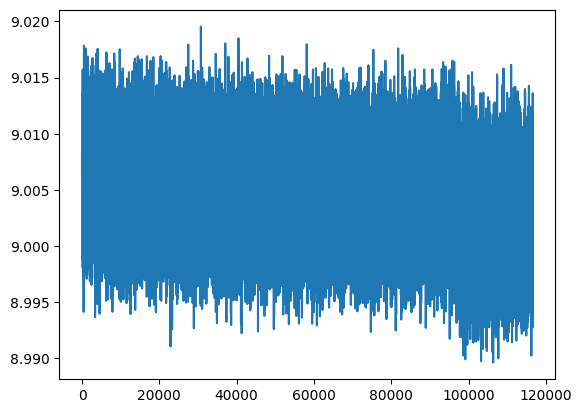

In [416]:
ax = plt.plot(train_loss_values[9050:])

In [444]:
trained_Xs = X_batch.detach().cpu().numpy()
trained_Xs = trained_Xs.tolist()
print(len(trained_Xs))
sp_processor.decode_ids(trained_Xs[0:2])

200


['ever with all the places she wanted to explore coloured in fun colours. molly got very excited, she showed it to her friends and they all wanted to go explore the world with her. her best friend, lucy, was really bossy and she said they could only go if they all went together. molly didn\'t want to be bossed around but she hoped she could convince lucy to change her mind. molly sat down with her map and lucy came to have a look. â€ ⁇ letâ€ ⁇ s go to this place!â€ molly said, pointing to a place on the map. lucy shook her head and said no. she wanted to go to a completely different place on the map. molly held her breath, this was her chance. she had to be brave and try to change lucy\'s mind. â€ ⁇ pleaseâ€ molly said softly, with a polite smile. to her surprise lucy thought about it for a moment and then said â€ ⁇ okayâ€. molly was so happy and the two of them went on to explore the world together. all thanks to a little bit of hoping!<EOS> <SOS>once upon a time, there was a sleepy b

# Inference 

In [ ]:
device = "cpu"
tiny_story_model.to(device)

In [417]:
# grab a random token and make the network generate things
# def generate_text(model, sp_processor, test_sentence):
test_sentence = "sara liked to play with her toys"
tiny_story_model.eval()
# token = torch.randint(0, V, (1, 1)).to(device)
tokens = sp_processor.encode_as_ids(f"<SOS>{test_sentence}")
# print(tokens)
generated_text = []

torch_tokens = torch.tensor([tokens]).to(device)
prev_tokens = torch_tokens
# print(tokens.shape)
distributions_acts = []
max_probs_lst = []

temperature = 0.9  # Adjust this parameter to control diversity

for i in range(50):
    with torch.no_grad():
        z = tiny_story_model(prev_tokens)
        scaled_z = z / temperature
        probs = torch.softmax(scaled_z, dim=-1)
        # distributions_acts.append(act)
        probs = probs.view(-1, V)  # len(generated_tokens) +i * V
        sampled_token = torch.multinomial(probs[-1, :], num_samples=2)
        # print(sampled_token)

        # max_probs, max_idxs = torch.max(probs, dim=-1)
        # max_probs_lst.append(probs[-1, sampled_token])

        # print(int(sampled_token), int(max_probs[-1]))
        # print(".")
        generated_text.append(int(sampled_token[0]))

        prev_tokens = torch.cat(
            (prev_tokens, torch.tensor([[sampled_token[0]]], device=device)), dim=1
        )
decoded_text = sp_processor.decode_ids(generated_text)

print(test_sentence + " [" + decoded_text + " ]")

sara liked to play with her toys [. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the park. the ]


In [34]:
probs.shape

torch.Size([11, 10000])

In [400]:
for t, p in zip(generated_text, max_probs_lst):
    print(sp_processor.decode(t), float(p), end=", ")

Once 0.9999822378158569, upon 0.9999823570251465, a 0.9999864101409912, little 0.9999864101409912, girl 0.9999818801879883, named 0.9999959468841553, Beep 0.9999864101409912, loved 0.9999868869781494, to 0.9794060587882996, go 0.9999847412109375, fast 0.9999902248382568, and 0.999988317489624, said 0.9999850988388062, , 0.9999988079071045, " 0.9879357814788818, Mom 0.9999853372573853, , 0.9999943971633911, " 0.990085244178772, Mom 0.9520663619041443, , 0.9999943971633911, " 0.9918128252029419, Mom 0.8985897898674011, , 0.9999943971633911, " 0.993184506893158, Mom 0.8695441484451294, , 0.9999943971633911, " 0.9942948222160339, Mom 0.851822018623352, , 0.9999943971633911, " 0.9951932430267334, Mom 0.8400238156318665, , 0.9999943971633911, " 0.9959267973899841, Mom 0.8316372632980347, , 0.9999943971633911, " 0.9965178966522217, Mom 0.82539302110672, , 0.9999943971633911, " 0.9970095157623291, Mom 0.820560097694397, , 0.9999943971633911, " 0.9974110722541809, Mom 0.81671142578125, , 0.9999

484800 960000
[9.45084253e-07 8.04790375e-06 1.13667030e-03 9.25837986e-02
 3.77411470e-01]


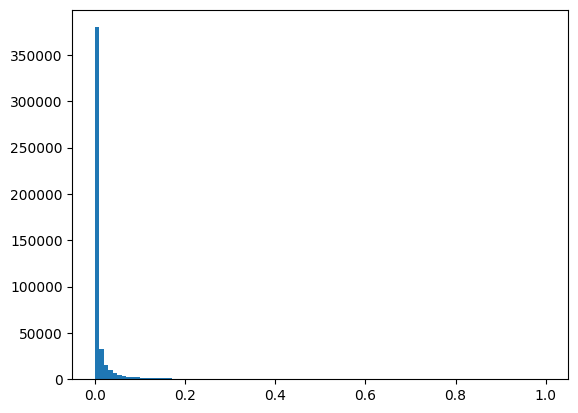

In [105]:
ax = plt.subplot()
vals = tiny_story_model.block.attn.a_softmax.view(-1).detach().to("cpu").numpy()
print(np.count_nonzero(vals), len(vals))
non_zeros = vals[np.where(vals != 0)]
print(np.quantile(non_zeros, [0.01, 0.05, 0.5, 0.95, 0.99]))
_ = ax.hist(non_zeros, bins=100)

In [132]:
# Example of target with class indices
random_loss = nn.CrossEntropyLoss()
input = torch.tensor(
    [
        [
            [0.9, 5.8, 0.2, -0.65, 0.3],
            [0.9, -1.8, 0.2, 0.65, 7.3],
            [10.9, -1.8, 0.2, -0.65, 0.3],
        ],
        [
            [0.9, 5.8, 0.2, -0.65, 0.3],
            [0.9, -1.8, 0.2, 0.65, 7.3],
            [10.9, -1.8, 0.2, -0.65, 0.3],
        ],
    ],
    requires_grad=True,
)
target = torch.tensor([[1, 4, 0], [2, 1, 1]], dtype=torch.long)
print(input.shape, target.shape)
print(input, target)
input_view = input.view(-1, 5)
target_view = target.view(-1)
print(input_view.shape, target_view.shape)
print(input_view, target_view)
print(".")
output = random_loss(input_view, target_view)
print(output)
# output.backward()
# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

torch.Size([2, 3, 5]) torch.Size([2, 3])
tensor([[[ 0.9000,  5.8000,  0.2000, -0.6500,  0.3000],
         [ 0.9000, -1.8000,  0.2000,  0.6500,  7.3000],
         [10.9000, -1.8000,  0.2000, -0.6500,  0.3000]],

        [[ 0.9000,  5.8000,  0.2000, -0.6500,  0.3000],
         [ 0.9000, -1.8000,  0.2000,  0.6500,  7.3000],
         [10.9000, -1.8000,  0.2000, -0.6500,  0.3000]]], requires_grad=True) tensor([[1, 4, 0],
        [2, 1, 1]])
torch.Size([6, 5]) torch.Size([6])
tensor([[ 0.9000,  5.8000,  0.2000, -0.6500,  0.3000],
        [ 0.9000, -1.8000,  0.2000,  0.6500,  7.3000],
        [10.9000, -1.8000,  0.2000, -0.6500,  0.3000],
        [ 0.9000,  5.8000,  0.2000, -0.6500,  0.3000],
        [ 0.9000, -1.8000,  0.2000,  0.6500,  7.3000],
        [10.9000, -1.8000,  0.2000, -0.6500,  0.3000]],
       grad_fn=<ViewBackward0>) tensor([1, 4, 0, 2, 1, 1])
.
tensor(4.5735, grad_fn=<NllLossBackward0>)


# Adhoc analysis and eda

Pos Enc shape torch.Size([1, 512, 512])
(512, 512)


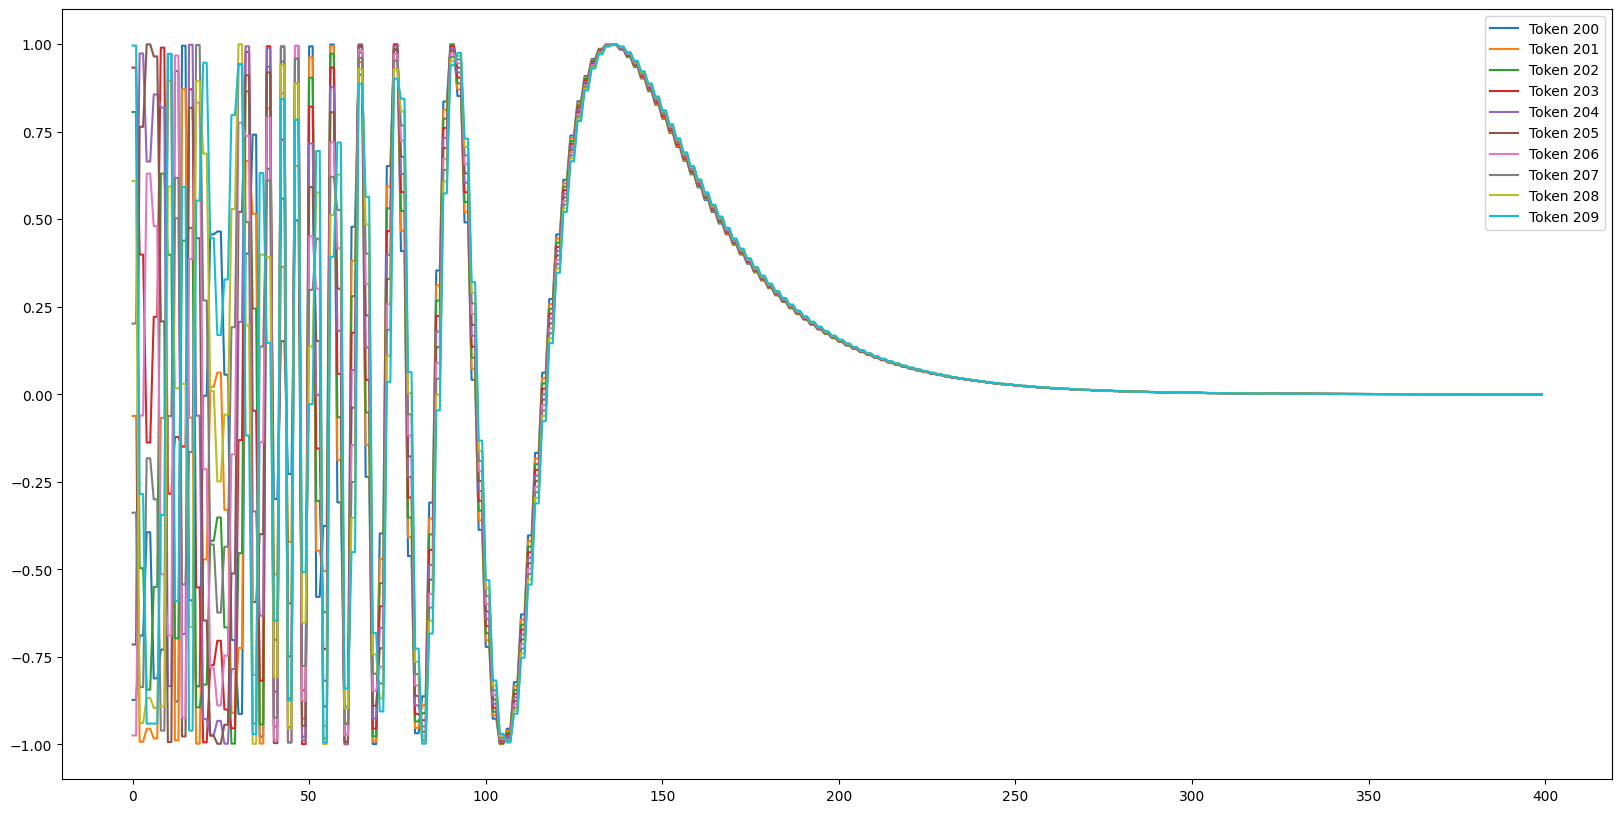

In [114]:
num_tokens = 512
p_num_tokens = PositionalEncoding(512, num_tokens)
# An arb tensor with 512 dimension and num_token  tokens
t1 = torch.ones(1, num_tokens, 1)
p_num_tokens_pos_encoding = p_num_tokens(t1)
# Lets plot some fo the num_tokens.
p_num_tokens_pos_encoding = (
    p_num_tokens_pos_encoding.squeeze(0).clone().detach().numpy()
)
print(p_num_tokens_pos_encoding.shape)
ax = plt.subplot(111)
ax.figure.set_size_inches(20, 10)

num_dims_to_plot = 400

for i in range(200, 210, 1):
    x = np.arange(0, num_dims_to_plot)
    ax.plot(x, p_num_tokens_pos_encoding[i, 0:num_dims_to_plot], label=f"Token {i}")
ax.legend()


We want the word `walk` to be more closely associated to `birds` in this specific text:

```
Birds sometimes walk                               
```
We want to do this because there are other examples in text:  

```
Sometimes for walking birds use floppy feet...

OR But birds don't just walk they fly...

```

Lets say we have a poorly trained Value vector for $\bold{V}$:


$$
V = \begin {bmatrix} 0.1 & 0.2 & 0.3 \\ -0.8 & 0.3 & -0.1 \\ 0.5 & -0.1 & -0.4 \end{bmatrix} \\
\text{where each token has a representation like:} \\
\\[5mm]
v1(Birds) -> [0.1, 0.2, 0.3] \\
v2(Usually) -> [-0.8, 0.3, -0.1] \\
v3(Fly) -> [0.5, -0.1, -0.4] \\
$$

and say you have a reasonably good attention $\bold{A}$ matrix trained

$$
A =  \begin{bmatrix} 1 & 0 & 0 \\ 0.1 & 0.9 & 0 \\ 0.6 & 0.1 & 0.4 \end{bmatrix} 
$$

Initially the dot product of the representations is pretty low:

$$
\vec{v3} \cdot \vec{v1} = 0.1*0.5 + 0.2*-0.1 + 0.3*-0.4 = 0.05 - 0.02 - 0.12 = {\LARGE \textbf{-0.09}}
$$

Now we want `walk` to pay more attention to `bird` and `usually` from a learnt $\bold{A}$

$$
\hat{v_{3}} = \begin{bmatrix} a_{3, 1}*v_{11} + a_{3, 2}*v_{21} + a_{3, 3}*v_{31} \\ a_{3, 1}*v_{12} + a_{3, 2}*v_{22} + a_{3, 3}*v_{32} \\ a_{3, 1}*v_{13} + a_{3, 2}*v_{23} + a_{3, 3}*v_{33} \end{bmatrix}
$$

$$   
\hat{v_{3}} = \left[\begin{array}{c}
a_{3, 1}*v_11 + a_{3, 2}*v_21 + a_{3, 3}*v_31 \quad \text{(Attention paid by `walk` to `bird` and `usually` *across* first column of v)} \\
a_{3, 1}*v_12 + a_{3, 2}*v_22 + a_{3, 3}*v_32 \quad \text{(Same thing but across the second dimension)} \\
a_{3, 1}*v_13 + a_{3, 2}*v_{23} + a_{3, 3}*v_{33} \quad \text{(... And the third dimension)}
\end{array}\right]
$$

$$
\hat{v_{3}} = \begin{bmatrix} 0.6*0.1 + 0.1*-0.8 + 0.4*0.5 \\ 0.6*0.2 + 0.1*0.3 + 0.4*-0.1 \\ 0.6*0.3 + 0.1*-0.1 + 0.4*-0.4 \end{bmatrix}
$$

$$
\hat{v_3} = \begin{bmatrix} 0.06 - 0.08 + 0.2 \\ 0.12 + 0.03 - 0.04 \\ 0.18 - 0.01 - 0.16 \end{bmatrix}
$$

It would seem that if we have learnt `A` well, i.e. `bird` is paying more attention to `walk`, then it seems to be now
closer to `walk` in the embedded space.
$$
\hat{v_3} = \begin{bmatrix} 0.18 \\ 0.11 \\ 0.01 \end{bmatrix} 
$$

Now: 

$$ 
\hat{v_3} \cdot v_3 = 0.18*0.1 +  0.11*0.2 + 0.01*0.3 = 0.018 + 0.022 + 0.003 = {\LARGE \textbf{0.043}}
$$
i.e. a better association between `walk` and `bird` in the embedded space.

## Mathematically speaking... 
1. I *think*, we are saying that the word `walk` is a **weighted** combination of all the other word embeddings.  And therefore I would conjecture that this may not be enough, linear functions are good but nonlinear are better so `V` will also be forward propagated to an MLP to learn any non linearity that's left.

2. Also notice that the final vector are three terms and over `n-grams` of differing sequence length. So perhaps the vector $v_3$ terms are these piece-wise, auto regressive collection of terms each is a linear function. This kind of reminds me of interaction terms in linear regression and how indicator variables are used to capture non-linear relationships? 
---

## Here is some matrix math for this stuff

$$
A = \begin{bmatrix} . & . & . \\ . & a_{i,j} & .\\. & . & . \end{bmatrix}
V = \begin{bmatrix} . & v_0 & . \\ . & v_1 & .\\. & v_2 & . \end{bmatrix}
\hat{V} = A.V 
$$

where V are the old embeddings and A are the Attention dot product.

$$
\hat{v_{i,j}} = \sum_{k=1}^{d_k} a_{i,k} v_{k,j}
$$

$$
\underline{\hat{v_{i}}} = \sum_{j=1}^{d_k} a_{i,j} * \underline{v_j}
$$
So we are *interacting* previously independent $\underline{v_j}s$ across the embedding.

---

We might have other examples in the text of `bird` being associated with the words `fly` too in the text. How could 
the network learn about it? I think the answer is  `capacity` which loosely translates to the number of parameters in the network we can use. Lets say we have a sentence:
```
But birds are good at ____. 
```
And the word we likely want learnt is `flying`. 

Capacity here would mean the opportunities for the word `flying` to learn the word association with the word `bird` and possibly `but` and `good`. Well if we consider just one attention head
1. There are `n_head` size for each vector in $\bold{V}$ opportunities to learn this association. 
2. In the Query matrix which has a `n_head` size vector Query for `flying`. Lets call this row `q_k`.
   - And Since we compute the attention row `a_i` as a product of `q_k` and `V` we have `n_head`*`n_head`  parameters, which is typically `48,000` different parameters just for whatever is representing `flying` in association with other words before it!
3. Not to mention the other functions that come later. 

In [2]:
import markdown2
import pdfkit
import pypandoc

# Your markdown text
# Convert markdown to HTML
# html_text = markdown2.markdown(text)

In [104]:
import pypandoc

# The Markdown content with corrected LaTeX math mode delimiters
with open("./test.md", "r") as f:
    markdown_content = '\n'.join(f.readlines())

# html_text = markdown2.markdown(markdown_content)
# print(html_text)
# write to this file in markdown first


# Convert Markdown to PDF
def clean_text_fn(text):

    # Remove non-printable characters
    clean_text = "".join(char for char in text if char.isprintable() or char in "\n\t")

    return clean_text
    # with open(output_filename, 'w', encoding='utf-8') as file:
    #     file.write(clean_text)


# clean_text = clean_text_fn(html_text)
# print(".")
# print(clean_text)
# print(markdown_content)
# print(".")
# print(clean_text)
output = pypandoc.convert_text(
    markdown_content,
    "pdf",
    format="md",
    outputfile="corrected_output.pdf",
    extra_args=[ "-s"],
)
output
# print("PDF generated successfully!")

RuntimeError: Pandoc died with exitcode "43" during conversion: Error producing PDF.
! Missing $ inserted.
<inserted text> 
                $
l.80 \begin{bmatrix}



In [105]:
output = pypandoc.convert_file(
    "./test.md",
    "pdf",
    format="md",
    outputfile="corrected_output.pdf",
    extra_args=[ "-s"],
)

In [164]:
raw_string = r"""
# Attention with a worked out example

We want the word `walk` to be more closely associated to `birds` in this specific text:

```
Birds sometimes walk                               
```
We want to do this because there are other examples in text:  

```
Sometimes for walking birds use floppy feet...

OR But birds don't just walk they fly...

```

Lets say we have a poorly trained Value vector for $\bold{V}$:


$$
\begin{aligned}
V = \begin {bmatrix} 0.1 & 0.2 & 0.3 \\ -0.8 & 0.3 & -0.1 \\ 0.5 & -0.1 & -0.4 \end{bmatrix} \\
\text{where each token has a representation like:} 
\\[10mm]
v1(Birds) -> [0.1, 0.2, 0.3] \\
v2(sometimes) -> [-0.8, 0.3, -0.1] \\
v3(Walk) -> [0.5, -0.1, -0.4] \\
\end{aligned}
$$

and say you have a reasonably good attention $\bold{A}$ matrix trained

$$
A =  \begin{bmatrix} 1 & 0 & 0 \\ 0.1 & 0.9 & 0 \\ 0.6 & 0.1 & 0.4 \end{bmatrix} 
$$

Initially the dot product of the representations is pretty low:

$$
\vec{v3} \cdot \vec{v1} = 0.1*0.5 + 0.2*-0.1 + 0.3*-0.4 = 0.05 - 0.02 - 0.12 = {\LARGE \textbf{-0.09}}
$$

Now we want `walk` to pay more attention to `bird` and `sometimes` from a learnt $\bold{A}$

$$
\hat{v_{3}} = \begin{bmatrix} a_{3, 1}*v_{11} + a_{3, 2}*v_{21} + a_{3, 3}*v_{31} \\ a_{3, 1}*v_{12} + a_{3, 2}*v_{22} + a_{3, 3}*v_{32} \\ a_{3, 1}*v_{13} + a_{3, 2}*v_{23} + a_{3, 3}*v_{33} \end{bmatrix}
$$

$$   
\hat{v_{3}} = \left[\begin{array}{c}
a_{31}*v_11 + a_{32}*v_{21} + a_{33}*v_{31} \quad \text{(Attention paid by `walk` to `bird` and `sometimes` *across* first column of v)} \\
a_{31}*v_12 + a_{32}*v_{22} + a_{33}*v_{32} \quad \text{(Same thing but across the second dimension)} \\
a_{31}*v_13 + a_{32}*v_{23} + a_{33}*v_{33} \quad \text{(... And the third dimension)}
\end{array}\right]
$$

$$
\hat{v_{3}} = \begin{bmatrix} 0.6*0.1 + 0.1*-0.8 + 0.4*0.5 \\ 0.6*0.2 + 0.1*0.3 + 0.4*-0.1 \\ 0.6*0.3 + 0.1*-0.1 + 0.4*-0.4 \end{bmatrix}
$$

$$
\hat{v_3} = \begin{bmatrix} 0.06 - 0.08 + 0.2 \\ 0.12 + 0.03 - 0.04 \\ 0.18 - 0.01 - 0.16 \end{bmatrix}
$$

It would seem that if we have learnt `A` well, i.e. `bird` is paying more attention to `walk`, then it seems to be now
closer to `walk` in the embedded space.
$$
\hat{v_3} = \begin{bmatrix} 0.18 \\ 0.11 \\ 0.01 \end{bmatrix} 
$$

Now: 

$$ 
\hat{v_3} \cdot v_3 = 0.18*0.1 +  0.11*0.2 + 0.01*0.3 = 0.018 + 0.022 + 0.003 = {\LARGE \textbf{0.043}}
$$
i.e. a better association between `walk` and `bird` in the embedded space.

## Thoughts on the Mathematics of this
1. I *think*, we are saying that the word `walk` is a **weighted** combination of all the other word embeddings.  And therefore I would conjecture that this may not be enough, linear functions are good but nonlinear are better so `V` will also be forward propagated to an MLP to learn any non linearity that's left.
2. Also notice that the final vector are three terms and over `n-grams` of differing sequence length. 
So perhaps the vector $v_3$ terms are these piece-wise, auto regressive collection of terms 
each is a linear function. This kind of reminds me of interaction terms in linear regression 
and how indicator variables are used to capture non-linear relationships. 
Is this thought too clever by half in how I think about these things?

## Thoughts on how does `bird` get attented to by `flying` in the same text where its associated with `walking`?
We might have other examples in the text of `bird` being associated with the words `fly` too in the text. How could 
the network learn about it and predict it? I think the answer is `capacity` which loosely translates to the number of parameters in the network we can use. Lets say we have a sentence:
```
But birds are good at ____. 
```
And the word we likely want learnt is `flying`. 

Capacity here would mean the opportunities for the word `flying` to learn the word association with the word `bird` and possibly `but` and `good`. Well if we consider just one attention head

1. There are `n_head` parameters for each vector in $\bold{V}$ opportunities to learn these associations. Is there a "partition" of dimension of learn't `v_i` that is different for `walk` and `flying`? 
2. Could it be that `walk` and `fly` i.e. the $a_{i,j}$ for ith token -- which are  learnt via Q,K -- are different for their preceeding phrases `"birds sometimes ____"` and `"birds are good at ____"`?
3. In the Query matrix which has a `n_head` size vector Query for `flying`. Lets call this row `q_k`.
   - And Since we compute the attention row `a_i` as a product of `q_k` and `V` we have `n_head`*`n_head`  parameters, which is typically `48,000` different parameters just for whatever  `flying` needs to attend to! A big space indeed.
4. Not to mention more parameters in MLP and other heads that get learnt later.


---

## Here is some matrix math for this stuff

$$
A = \begin{bmatrix} . & . & . \\ . & a_{i,j} & .\\. & . & . \end{bmatrix}
V = \begin{bmatrix} . & v_0 & . \\ . & v_1 & .\\. & v_2 & . \end{bmatrix}
\hat{V} = A.V 
$$

where V are the old embeddings and A are the Attention dot product.

$$
\hat{v_{i,j}} = \sum_{k=1}^{d_k} a_{i,k} v_{k,j}
$$

$$
\underline{\hat{v_{i}}} = \sum_{j=1}^{d_k} a_{i,j} * \underline{v_j}
$$
So we are *interacting* previously independent $\underline{v_j}s$ across the embedding.

---

"""
output = pypandoc.convert_text(
    raw_string,
    "pdf",
    format="md",
    outputfile="attention_workedout.pdf",
    extra_args=[ "-s"],
)